# New Delhi PM 2.5 Data

The dataset used for this analysis encompasses six distinct CSV files, each file representing a year from 2019-2024. The first step was to merge all of these CSV files into a single dataset, to be able to analyze data across the entire timeframe.  

In [1031]:
#importing libraries
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# merging csv files into single dataframe 
df = pd.concat( 
    map(pd.read_csv, [    
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2019_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2020_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2021_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2022_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2023_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2024_YTD.csv']) )

#printing out first five rows of dataset
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2019-01-01 01:00 AM,2019,1,1,1,463.1,475,Hazardous,543.0,UG/M3,1 Hr,Valid
1,New Delhi,PM2.5 - Principal,2019-01-01 02:00 AM,2019,1,1,2,496.1,497,Hazardous,529.0,UG/M3,1 Hr,Valid
2,New Delhi,PM2.5 - Principal,2019-01-01 03:00 AM,2019,1,1,3,502.0,501,Hazardous,508.0,UG/M3,1 Hr,Valid
3,New Delhi,PM2.5 - Principal,2019-01-01 04:00 AM,2019,1,1,4,452.0,468,Hazardous,402.0,UG/M3,1 Hr,Valid
4,New Delhi,PM2.5 - Principal,2019-01-01 05:00 AM,2019,1,1,5,384.5,423,Hazardous,317.0,UG/M3,1 Hr,Valid


Important Definitions:

NowCast Concentration: "The NowCast is used in lieu of a 24-hour average PM concentration in the calculation of the AQI until an entire calendar day of hourly concentrations has been monitored"

AQI: "The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is"

# Data Discovery

First I understood all the different datatypes in the dataset:

In [1032]:
#printing datatypes 
print(df.info())
print('\n')

#printing statistical summary
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 43667 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           43667 non-null  object 
 1   Parameter      43667 non-null  object 
 2   Date (LT)      43667 non-null  object 
 3   Year           43667 non-null  int64  
 4   Month          43667 non-null  int64  
 5   Day            43667 non-null  int64  
 6   Hour           43667 non-null  int64  
 7   NowCast Conc.  43667 non-null  float64
 8   AQI            43667 non-null  int64  
 9   AQI Category   43462 non-null  object 
 10  Raw Conc.      43667 non-null  float64
 11  Conc. Unit     43667 non-null  object 
 12  Duration       43667 non-null  object 
 13  QC Name        43667 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 5.0+ MB
None


               Year         Month           Day          Hour  NowCast Conc.  \
count  43667.000000  43667.000000  43667.000

Next, I changed the datatype of some columns for greater efficiency. I changed the Date column into date time format and changed most columns from object to category as it would better represent the data as well as save memory. 

In [1033]:
#Changed Date column into datetime format
df["Date (LT)"] = pd.to_datetime(df["Date (LT)"])

#Canged the following columns to category from object
df['AQI Category'] = df['AQI Category'].astype('category')  
df['Site'] = df['Site'].astype('category') 
df['Parameter'] = df['Parameter'].astype('category')  
df['Conc. Unit'] = df['Conc. Unit'].astype('category') 
df['Duration'] = df['Duration'].astype('category') 
df['QC Name'] = df['QC Name'].astype('category') 

#Printing the new datatypes
print(df.dtypes)

Site                   category
Parameter              category
Date (LT)        datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
NowCast Conc.           float64
AQI                       int64
AQI Category           category
Raw Conc.               float64
Conc. Unit             category
Duration               category
QC Name                category
dtype: object


# Data Structuring

A lot of the columns in the dataset were unnecessary, I removed them in order to save more memory. 

In [1034]:
# dropping unecessary columns 
df = df.drop('Site', axis=1) #Site is New Delhi for all
df = df.drop('Parameter', axis=1) #Parameter is PM 2.5 for all
df = df.drop('Conc. Unit', axis=1) #Concentration unit is same throughout
df = df.drop('Duration', axis=1) #Duration is 1h for all

#Removed year, month, day & hour column as dataset already has Date column with all these details
df = df.drop('Year', axis=1) 
df = df.drop('Month', axis=1) 
df = df.drop('Day', axis=1) 
df = df.drop('Hour', axis=1) 

#Printing new columns
print(df)

               Date (LT)  NowCast Conc.  AQI AQI Category  Raw Conc. QC Name
0    2019-01-01 01:00:00          463.1  475    Hazardous      543.0   Valid
1    2019-01-01 02:00:00          496.1  497    Hazardous      529.0   Valid
2    2019-01-01 03:00:00          502.0  501    Hazardous      508.0   Valid
3    2019-01-01 04:00:00          452.0  468    Hazardous      402.0   Valid
4    2019-01-01 05:00:00          384.5  423    Hazardous      317.0   Valid
...                  ...            ...  ...          ...        ...     ...
1435 2024-02-29 21:00:00           66.5  157    Unhealthy       82.0   Valid
1436 2024-02-29 22:00:00           76.2  162    Unhealthy       86.0   Valid
1437 2024-02-29 23:00:00           98.6  173    Unhealthy      121.0   Valid
1438 2024-03-01 00:00:00          104.3  176    Unhealthy      110.0   Valid
1439 2024-03-01 01:00:00          110.1  179    Unhealthy      116.0   Valid

[43667 rows x 6 columns]


# Data Cleaning & Validation

In [1035]:
#printing the total number of rows in the dataset:
total_rows = len(df)
print("Number of rows:", total_rows)

Number of rows: 43667


One of the columns in the dataset, represented the Quality Control of the measurements. I calculated how many of the values in that column were invalid or missing as well as what percent of the total dataset those values were. The low percentage suggests that it would be okay to replace them with mean values instead.

In [1036]:
#printing out all the unique values in the QC column 
unique_values = df['QC Name'].unique()
print("Values in QC:")
for value in unique_values:
    print(value)

Values in QC:
Valid
Invalid
Missing


In [1037]:
#Adding together the number of Invalid and Missing QC values
invalid_count = df['QC Name'].eq('Invalid').sum()
missing_count = df['QC Name'].isna().sum()
total_invalid = invalid_count + missing_count
print("Total Invalid/Missing Count:", total_invalid)

#calculating the percentage of rows which are invalid/missing
percentage_invalid = round((total_invalid / total_rows) * 100, 2)
print("Percentage of rows which are Invalid/Missing : ") 
print (percentage_invalid, "%")

Total Invalid/Missing Count: 208
Percentage of rows which are Invalid/Missing : 
0.48 %


A lot of the elements in the NowCast/Raw Conc. and AQI column were extremley low which does not make sense for a city like Delhi with horrible air quality. I calculated the number of elements less than 30 in each of these columns. 

In [1038]:
#Elements less than 30:

NowCast_under_30 = (df['NowCast Conc.'] < 30).sum()
print("Number of NowCast Conc. elements less than 30:", NowCast_under_30)

AQI_under_30 = (df['AQI'] < 30).sum()
print("Number of AQI elements less than 30:", AQI_under_30)

RawConc_under_30 = (df['Raw Conc.'] < 30).sum()
print("Number of AQI elements less than 30:", RawConc_under_30)

Number of NowCast Conc. elements less than 30: 8473
Number of AQI elements less than 30: 424
Number of AQI elements less than 30: 8489


All of these values were really high, which means they cannot be dropped, which is why I decided to filter out the values and calculate the mean for only the values greater than 30. 

In [1039]:
NowCast_filtered_values = df[df['NowCast Conc.'] > 30]
mean_filteredNowCast = round(NowCast_filtered_values['NowCast Conc.'].mean(), 2)

print("Mean NowCast of values greater than 30:", mean_filteredNowCast)

AQI_filtered_values = df[df['AQI'] > 30]
mean_filteredAQI = round(AQI_filtered_values['AQI'].mean(), 2)

print("Mean AQI of values greater than 30:", mean_filteredAQI)

RawConc_filtered_values = df[df['Raw Conc.'] > 30]
mean_filteredRawConc = round(AQI_filtered_values['Raw Conc.'].mean(), 2)

print("Mean AQI of values greater than 30:", mean_filteredRawConc)


Mean NowCast of values greater than 30: 117.82
Mean AQI of values greater than 30: 164.47
Mean AQI of values greater than 30: 99.43


Next, I printed out all the different categories in the AQI category column. As well as the number of times each category appears. The Unhealthy category appears to be the most common. 

In [1040]:
#unique values in Air category column 
unique_cat = df['AQI Category'].unique()
print("Values in AQI Category:")
for value in unique_cat:
    print(value)
print("\n")
cat_counts = df.groupby('AQI Category').size()
print(cat_counts)

Values in AQI Category:
Hazardous
Very Unhealthy
Unhealthy
Unhealthy for Sensitive Groups
Moderate
nan
Good


AQI Category
Good                               1025
Hazardous                          3336
Moderate                           9914
Unhealthy                         14826
Unhealthy for Sensitive Groups     8073
Very Unhealthy                     6288
dtype: int64


I created a conditon for the columns NowCast Conc, AQI & Raw Conc. If the values were less than 30 or the QC column was invalid/missing the column value would be replaced with the mean of the filtered column. Additionally, if both of these conditions would be met, the AQI category would be replaced with Unhealthy.

In [1041]:
#creating condition
NowCastcondition = (df['NowCast Conc.'] < 30) | (df['QC Name'].isin(['Invalid', 'Missing']))
#replacing
df.loc[NowCastcondition, 'NowCast Conc.'] = mean_filteredNowCast

#creating condition
AQIcondition = (df['AQI'] < 30) | (df['QC Name'].isin(['Invalid', 'Missing']))
#replacing
df.loc[AQIcondition, 'AQI'] = mean_filteredAQI

#creating condition
RawConccondition = (df['Raw Conc.'] < 30) | (df['QC Name'].isin(['Invalid', 'Missing']))
#replacing
df.loc[RawConccondition, 'Raw Conc.'] = mean_filteredRawConc

#replacing category
df.loc[NowCastcondition | AQIcondition | RawConccondition, 'AQI Category'] = 'Unhealthy'

After this, I checked to see if there were any null values remaning:

In [1042]:
#Counting the number of null values 
null_counts = df.isnull().sum() 
print("Number of null values:")
print(null_counts)

Number of null values:
Date (LT)        0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
QC Name          0
dtype: int64


# Data Analysis

Now, I analyzed the cleaned data in different ways.

In [1043]:
#printing statistical summary of cleaned data
print(df.describe())

                           Date (LT)  NowCast Conc.           AQI  \
count                          43667   43667.000000  43667.000000   
mean   2021-08-15 00:13:27.190784512     117.732267    164.380159   
min              2019-01-01 01:00:00      30.000000     30.000000   
25%              2020-05-06 23:30:00      56.100000    102.000000   
50%              2021-08-08 13:00:00     114.000000    157.000000   
75%              2022-12-02 00:30:00     136.750000    193.000000   
max              2024-03-01 01:00:00     970.000000    810.000000   
std                              NaN      82.076126     83.785573   

          Raw Conc.  
count  43667.000000  
mean     114.690909  
min       30.000000  
25%       55.000000  
50%       99.430000  
75%      136.000000  
max     1039.000000  
std       84.811974  


Here, I generated bar graphs for the frequency of the NowCast Conc, AQI & Raw Conc columns.

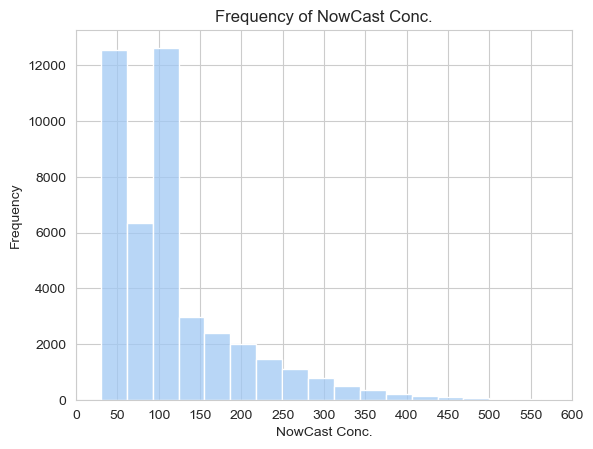

In [1044]:
#plotting NowCast Conc.
sns.histplot(data=df, x='NowCast Conc.', bins=30)
plt.xlabel('NowCast Conc.')
plt.ylabel('Frequency')
plt.title('Frequency of NowCast Conc.')
plt.xlim(0, 600)
plt.xticks(range(0, 650, 50))
plt.show()


This histogram, shows that most of NowCast Conc. values are located around 100. There is also an unusually high number of values close to 50, which could be due to errors in data collection.

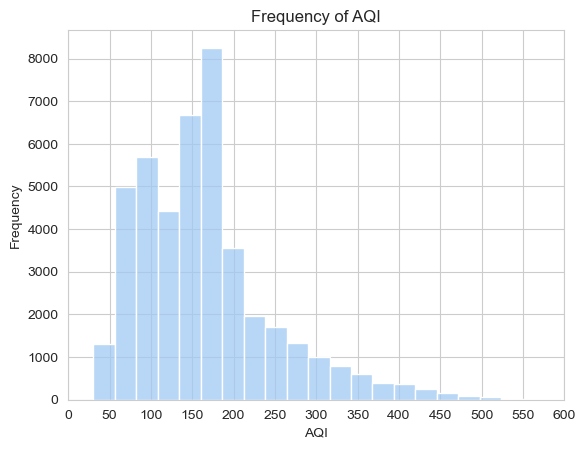

In [1045]:
#plotting AQI
sns.histplot(data=df, x='AQI', bins=30)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Frequency of AQI')
plt.xlim(0, 600)
plt.xticks(range(0, 650, 50))  
plt.show()

This histogram, shows that most of  AQI values are located between 150-200, showing that the Air Quality is usually poor in New Delhi.

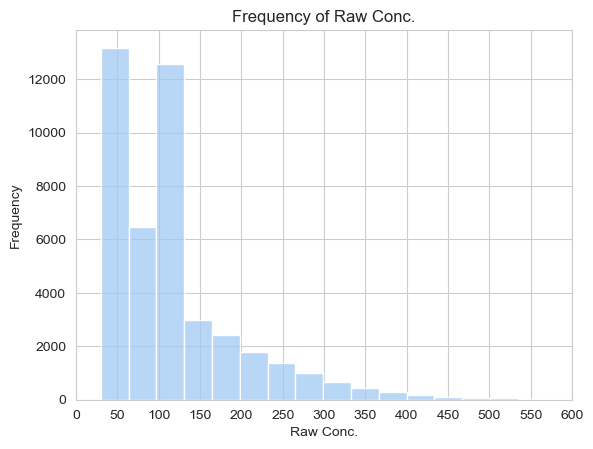

In [1046]:
#plotting Raw Conc.
sns.histplot(data=df, x='Raw Conc.', bins=30)
plt.xlabel('Raw Conc.')
plt.ylabel('Frequency')
plt.title('Frequency of Raw Conc.')
plt.xlim(0, 600)
plt.xticks(range(0, 650, 50))  
plt.show()

This histogram, simmilar to the NowCast Conc. shows that most of Raw Conc. values are located close to 100 but there is also a high number of values close to 50. 

After this stage, I only worked with the AQI data, as the AQI data itself is based on the NowCast & Raw Conc. data. I plotted a graph with the average daily AQI values throughout the year.

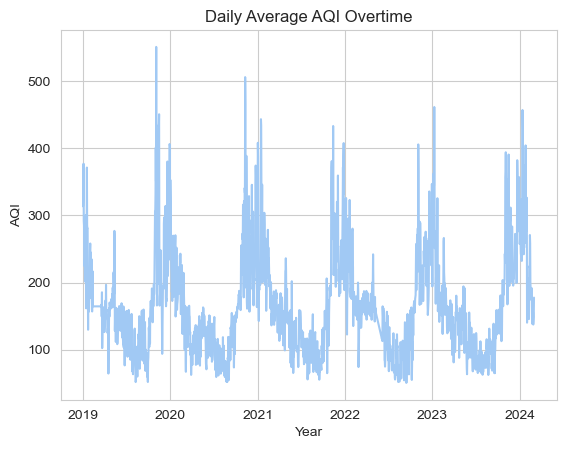

In [1047]:
# Grouping the dataframe by date and calculating the daily average AQI
dailyavg_aqi = df.groupby(df['Date (LT)'].dt.date)['AQI'].mean().reset_index()

# Plot the data
sns.lineplot(data=dailyavg_aqi, x='Date (LT)', y='AQI')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Daily Average AQI Overtime')
plt.show()

The graph, shows that the highest daily average AQI was recorded towards the end of 2019. The lowest AQI seems simmilar for all the years 

Next, I plotted the yearly average AQI for all the years.

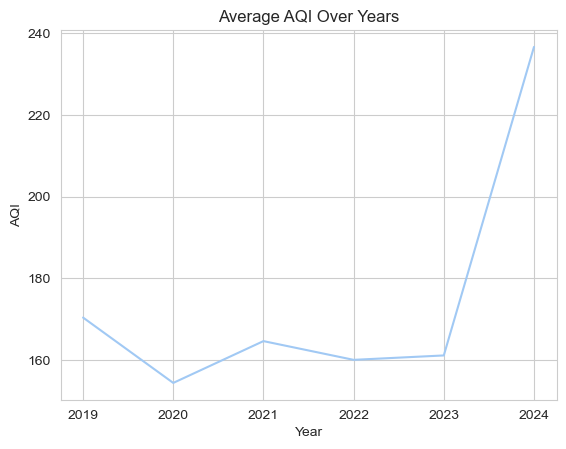

In [1048]:
# Grouping the dataframe by year and calculating the yearly average AQI
yearly_avg_aqi = df.groupby(df['Date (LT)'].dt.year)['AQI'].mean().reset_index()
#plotting the graph
sns.lineplot(data=yearly_avg_aqi, x='Date (LT)', y='AQI')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Average AQI Over Years')
plt.show()

According to this graph, the maximum yearly average AQI has been in 2024. But it is important to consider that the 2024 dataset only contained data till 2024. Excluding 2024, highest average is in 2019 and lowest in 2020.

Next I plotted the monthly averages for each year. 

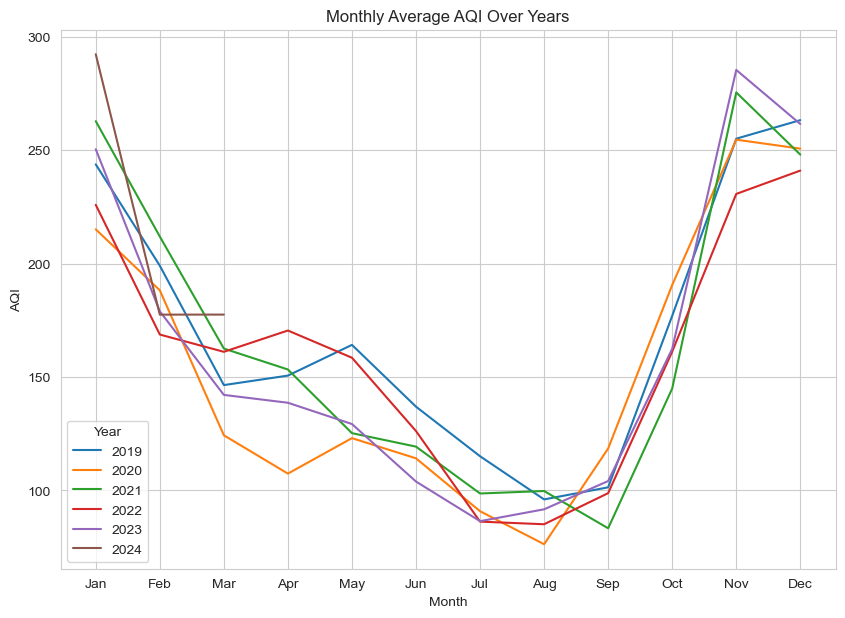

In [1049]:
# Extract year and month from Date (LT) column
df['Year'] = df['Date (LT)'].dt.year
df['Month'] = df['Date (LT)'].dt.month

# Group the dataframe by year and month and calculate the mean of AQI for each month

monthly_avg_aqi = df.groupby(['Year', 'Month'])['AQI'].mean().reset_index()

# Plotting graph
plt.figure(figsize=(10, 7))
sns.lineplot(data=monthly_avg_aqi, x='Month', y='AQI', hue='Year', palette='tab10')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly Average AQI Over Years')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


At a glance, the graph shows that the seasonal variations for average AQI is same throughout the years. The highest is between winter months (Nov-Jan) and the lowest is around the months of July-September.

Next, I calculated the average of each month throughout the years and plotted a bar graph with it. 

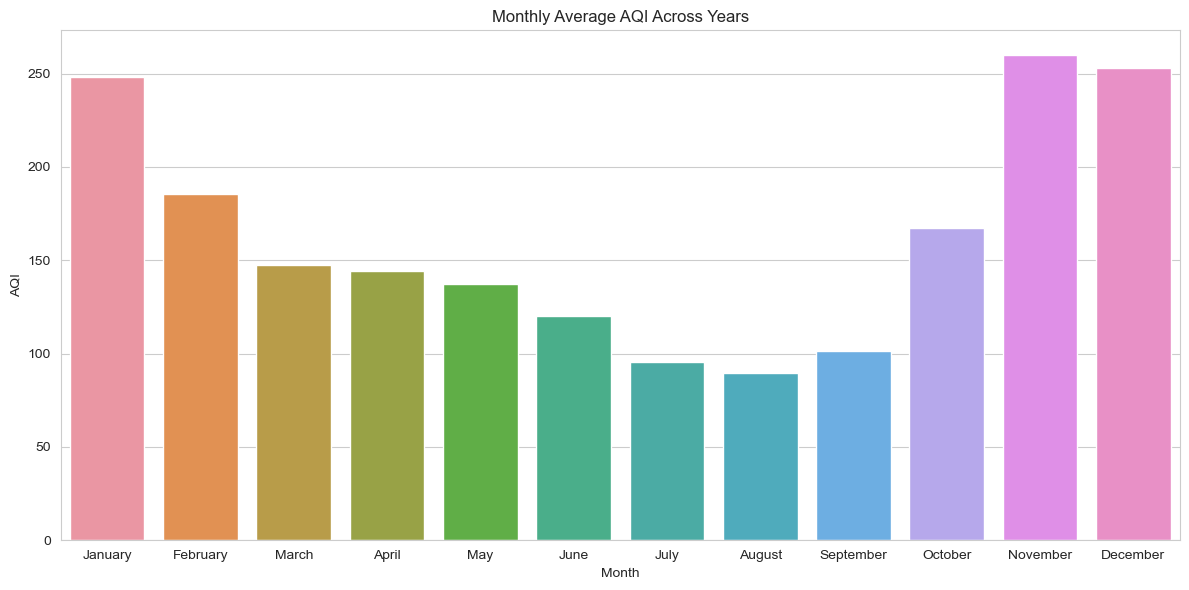

In [1050]:
#grouping by month and calculating mean
monthly_avg_aqi_all_years = df.groupby(df['Date (LT)'].dt.month)['AQI'].mean().reset_index()
#plotting graph
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(data=monthly_avg_aqi_all_years, x='Date (LT)', y='AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly Average AQI Across Years')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])  # Rotate the labels for better readability
plt.tight_layout()
plt.show()


Simmilar to the previous graph this graph also shows the highest AQI to be around the winter months. The highest average was in the month of November, with the lowest in August.

Finally, I plotted a pi chart to see the variations in AQI category 

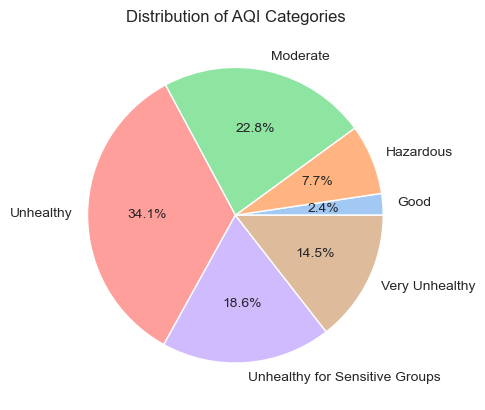

In [1051]:
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of AQI Categories')
plt.show()

The pi chart clearly shows that most of the AQI is in the unhealthy category, followed by Unhealthy for sensitive groups. 